In [1]:
pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1.Defining Data and Model

In [2]:
#importing the required modules
from torch import nn
import torch
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#defining the function to create a pytorch model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float32),requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float32),requires_grad=True)
    def forward(self, x:torch.Tensor):
        return self.weight * x + self.bias

In [4]:
#set manula seed
torch.manual_seed =43

#create instance of Model class
model0 = LinearRegression()

#check parameters
list(model0.parameters())

[Parameter containing:
 tensor([0.7149], requires_grad=True),
 Parameter containing:
 tensor([0.3906], requires_grad=True)]

In [25]:
# Now getting the training data
X = torch.arange(0,1,0.02).unsqueeze(1).float()
X.shape

torch.Size([50, 1])

In [30]:
#Generating y value from X
Y = 0.5*X+0.01
Y.shape

torch.Size([50, 1])

In [32]:
# Now doing the train-test split
x_train,y_train = X[:40],Y[:40]
x_test,y_test = X[40:],Y[40:]

### 2.Visualization

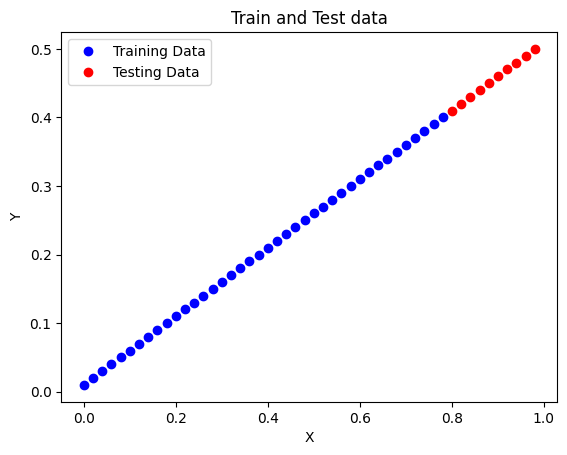

In [ ]:
#plotting the data
plt.plot(x_train,y_train, 'bo', label='train')
plt.plot(x_test,y_test, 'ro', label='test')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Train and Test data')
plt.legend({'Training Data': 'blue', 'Testing Data': 'red'})
plt.show()

In [34]:
#checking the model params
model0.state_dict()

OrderedDict([('weight', tensor([11.2312])), ('bias', tensor([2.4036]))])

### 3.Definig the Training Loop

In [44]:
#defining the loss function and optimizer
loss_fn = nn.L1Loss()
#defining the optimizer
optimizer = torch.optim.SGD(model0.parameters(),lr=0.08)
#defining the number of epochs
epochs = 100

In [41]:
torch.manual_seed = 30
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model0(x_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model0(x_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 4.274575233459473 | MAE Test Loss: 9.182809829711914 
Epoch: 10 | MAE Train Loss: 3.708594799041748 | MAE Test Loss: 8.516761779785156 
Epoch: 20 | MAE Train Loss: 3.2338955402374268 | MAE Test Loss: 7.901467800140381 
Epoch: 30 | MAE Train Loss: 2.8549790382385254 | MAE Test Loss: 7.346698760986328 
Epoch: 40 | MAE Train Loss: 2.5578160285949707 | MAE Test Loss: 6.846426486968994 
Epoch: 50 | MAE Train Loss: 2.323430299758911 | MAE Test Loss: 6.39961576461792 
Epoch: 60 | MAE Train Loss: 2.139223575592041 | MAE Test Loss: 6.0020246505737305 
Epoch: 70 | MAE Train Loss: 1.9947569370269775 | MAE Test Loss: 5.6458845138549805 
Epoch: 80 | MAE Train Loss: 1.8804515600204468 | MAE Test Loss: 5.332087516784668 
Epoch: 90 | MAE Train Loss: 1.7927172183990479 | MAE Test Loss: 5.0552802085876465 


In [42]:
#creating training loop
def train(model,loss_fn,optimizer,x_train,y_train,epochs):
    final_loss =[]
    final_params =[]
    for epoch in range(epochs):
        #setting the model to training mode
        model.train()

        #1.performing the forward pass 
        y_pred = model(x_train)

        #2.calculate the loss 
        loss = loss_fn(y_pred,y_train)

        #3.Zero out gradients
        optimizer.zero_grad()

        #4.Loss Backwards
        loss.backward()

        #5.progress the optimizer
        optimizer.step()
        final_loss.append(loss)
    return final_loss


In [45]:
train(model0,loss_fn,optimizer,x_train,y_train,epochs)

[tensor(1.4186, grad_fn=<MeanBackward0>),
 tensor(1.4155, grad_fn=<MeanBackward0>),
 tensor(1.4128, grad_fn=<MeanBackward0>),
 tensor(1.4100, grad_fn=<MeanBackward0>),
 tensor(1.4072, grad_fn=<MeanBackward0>),
 tensor(1.4044, grad_fn=<MeanBackward0>),
 tensor(1.4016, grad_fn=<MeanBackward0>),
 tensor(1.3988, grad_fn=<MeanBackward0>),
 tensor(1.3960, grad_fn=<MeanBackward0>),
 tensor(1.3932, grad_fn=<MeanBackward0>),
 tensor(1.3904, grad_fn=<MeanBackward0>),
 tensor(1.3876, grad_fn=<MeanBackward0>),
 tensor(1.3848, grad_fn=<MeanBackward0>),
 tensor(1.3820, grad_fn=<MeanBackward0>),
 tensor(1.3793, grad_fn=<MeanBackward0>),
 tensor(1.3765, grad_fn=<MeanBackward0>),
 tensor(1.3737, grad_fn=<MeanBackward0>),
 tensor(1.3709, grad_fn=<MeanBackward0>),
 tensor(1.3681, grad_fn=<MeanBackward0>),
 tensor(1.3653, grad_fn=<MeanBackward0>),
 tensor(1.3625, grad_fn=<MeanBackward0>),
 tensor(1.3597, grad_fn=<MeanBackward0>),
 tensor(1.3569, grad_fn=<MeanBackward0>),
 tensor(1.3541, grad_fn=<MeanBackw

### 4.Saving the Model

In [47]:
#saving the model 
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#defining the Model Name
MODEL_NAME = "saved_model_0.pth"

#Final Model Save Path
final_path = MODEL_PATH/MODEL_NAME
final_path

WindowsPath('models/saved_model_0.pth')

In [48]:
#Now Saving the Model
torch.save(obj=model0.state_dict(),f=final_path)

### 5.Loading the Saved Model

In [53]:
#For loading the model we will first have to create the model class instance
loaded_model_0 = LinearRegression()

#Check the state_dict
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.8443])), ('bias', tensor([1.4505]))])

In [54]:
# Now updating the state dict 
loaded_model_0.load_state_dict(torch.load("D:\Deep Learning\PyTorch Practise\models\saved_model_0.pth"))

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kbsha\AppData\Local\Temp\ipykernel_6604\2117993992.py:2: SyntaxWarning: invalid escape sequence '\D'
  loaded_model_0.load_state_dict(torch.load("D:\Deep Learning\PyTorch Practise\models\saved_model_0.pth"))


<All keys matched successfully>

In [ ]:
#Making Predictions using the Loaded model
loaded_model_0(x_test)

tensor([[2.5680],
        [2.6915],
        [2.8150],
        [2.9385],
        [3.0620],
        [3.1855],
        [3.3090],
        [3.4325],
        [3.5560],
        [3.6795]], grad_fn=<AddBackward0>)

In [ ]:
#Making Predictions using original model
model0(x_test)

tensor([[2.5680],
        [2.6915],
        [2.8150],
        [2.9385],
        [3.0620],
        [3.1855],
        [3.3090],
        [3.4325],
        [3.5560],
        [3.6795]], grad_fn=<AddBackward0>)

### 6.Revision

In [65]:
#IMport Modules
import torch
from matplotlib import pyplot
from torch import nn

In [66]:
torch.__version__

'2.7.0+cpu'

In [68]:
#device agnostic code
device = "cude" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [75]:
#Now reading the data
X= torch.arange(0,1,0.02).unsqueeze(1)
Y = 0.7*(X)+0.3

In [ ]:
#split the train-split
train_split = int(0.8 * len(X))
x_train = X[:train_split]
y_train = Y[:train_split]

x_test = X[train_split:]
y_test = Y[train_split:]

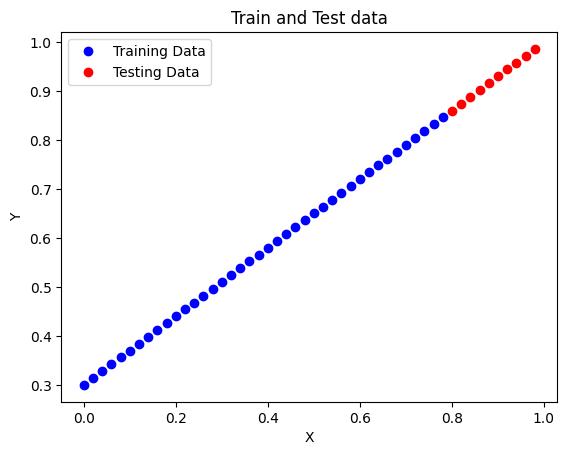

In [87]:
plt.plot(x_train,y_train, 'bo', label='train')
plt.plot(x_test,y_test, 'ro', label='test')
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Train and Test data')
plt.legend({'Training Data': 'blue', 'Testing Data': 'red'})
plt.show()

In [ ]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight =  torch.rand
        self.bias = 